# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [54]:
# Import necessary libraries for data manipulation, visualization, text processing, model building, and sentiment analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for text preprocessing: regular expressions, string operations, stopword removal, and tokenization.
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# Download all necessary NLTK data packages. This is often required for various text processing tasks like tokenization.
import nltk
nltk.download('all')

# Libraries for model building: splitting data, feature extraction using TF-IDF, Naive Bayes classifier, and evaluation metrics.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Library for sentiment analysis using TextBlob.
from textblob import TextBlob

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

### Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:


•	Text: The content of the blog post. Column name: Data


•	Category: The category to which the blog post belongs. Column name: Labels


In [55]:
df = pd.read_csv('blogs.csv')

Tasks
1. Data Exploration and Preprocessing


•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.


•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.


•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [56]:
df.head() #no one can understand this

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [57]:
df.shape

(2000, 2)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [59]:
df.isnull().sum()

,0
Data,0
Labels,0


/tmp/ipython-input-611234135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Labels', palette='viridis')


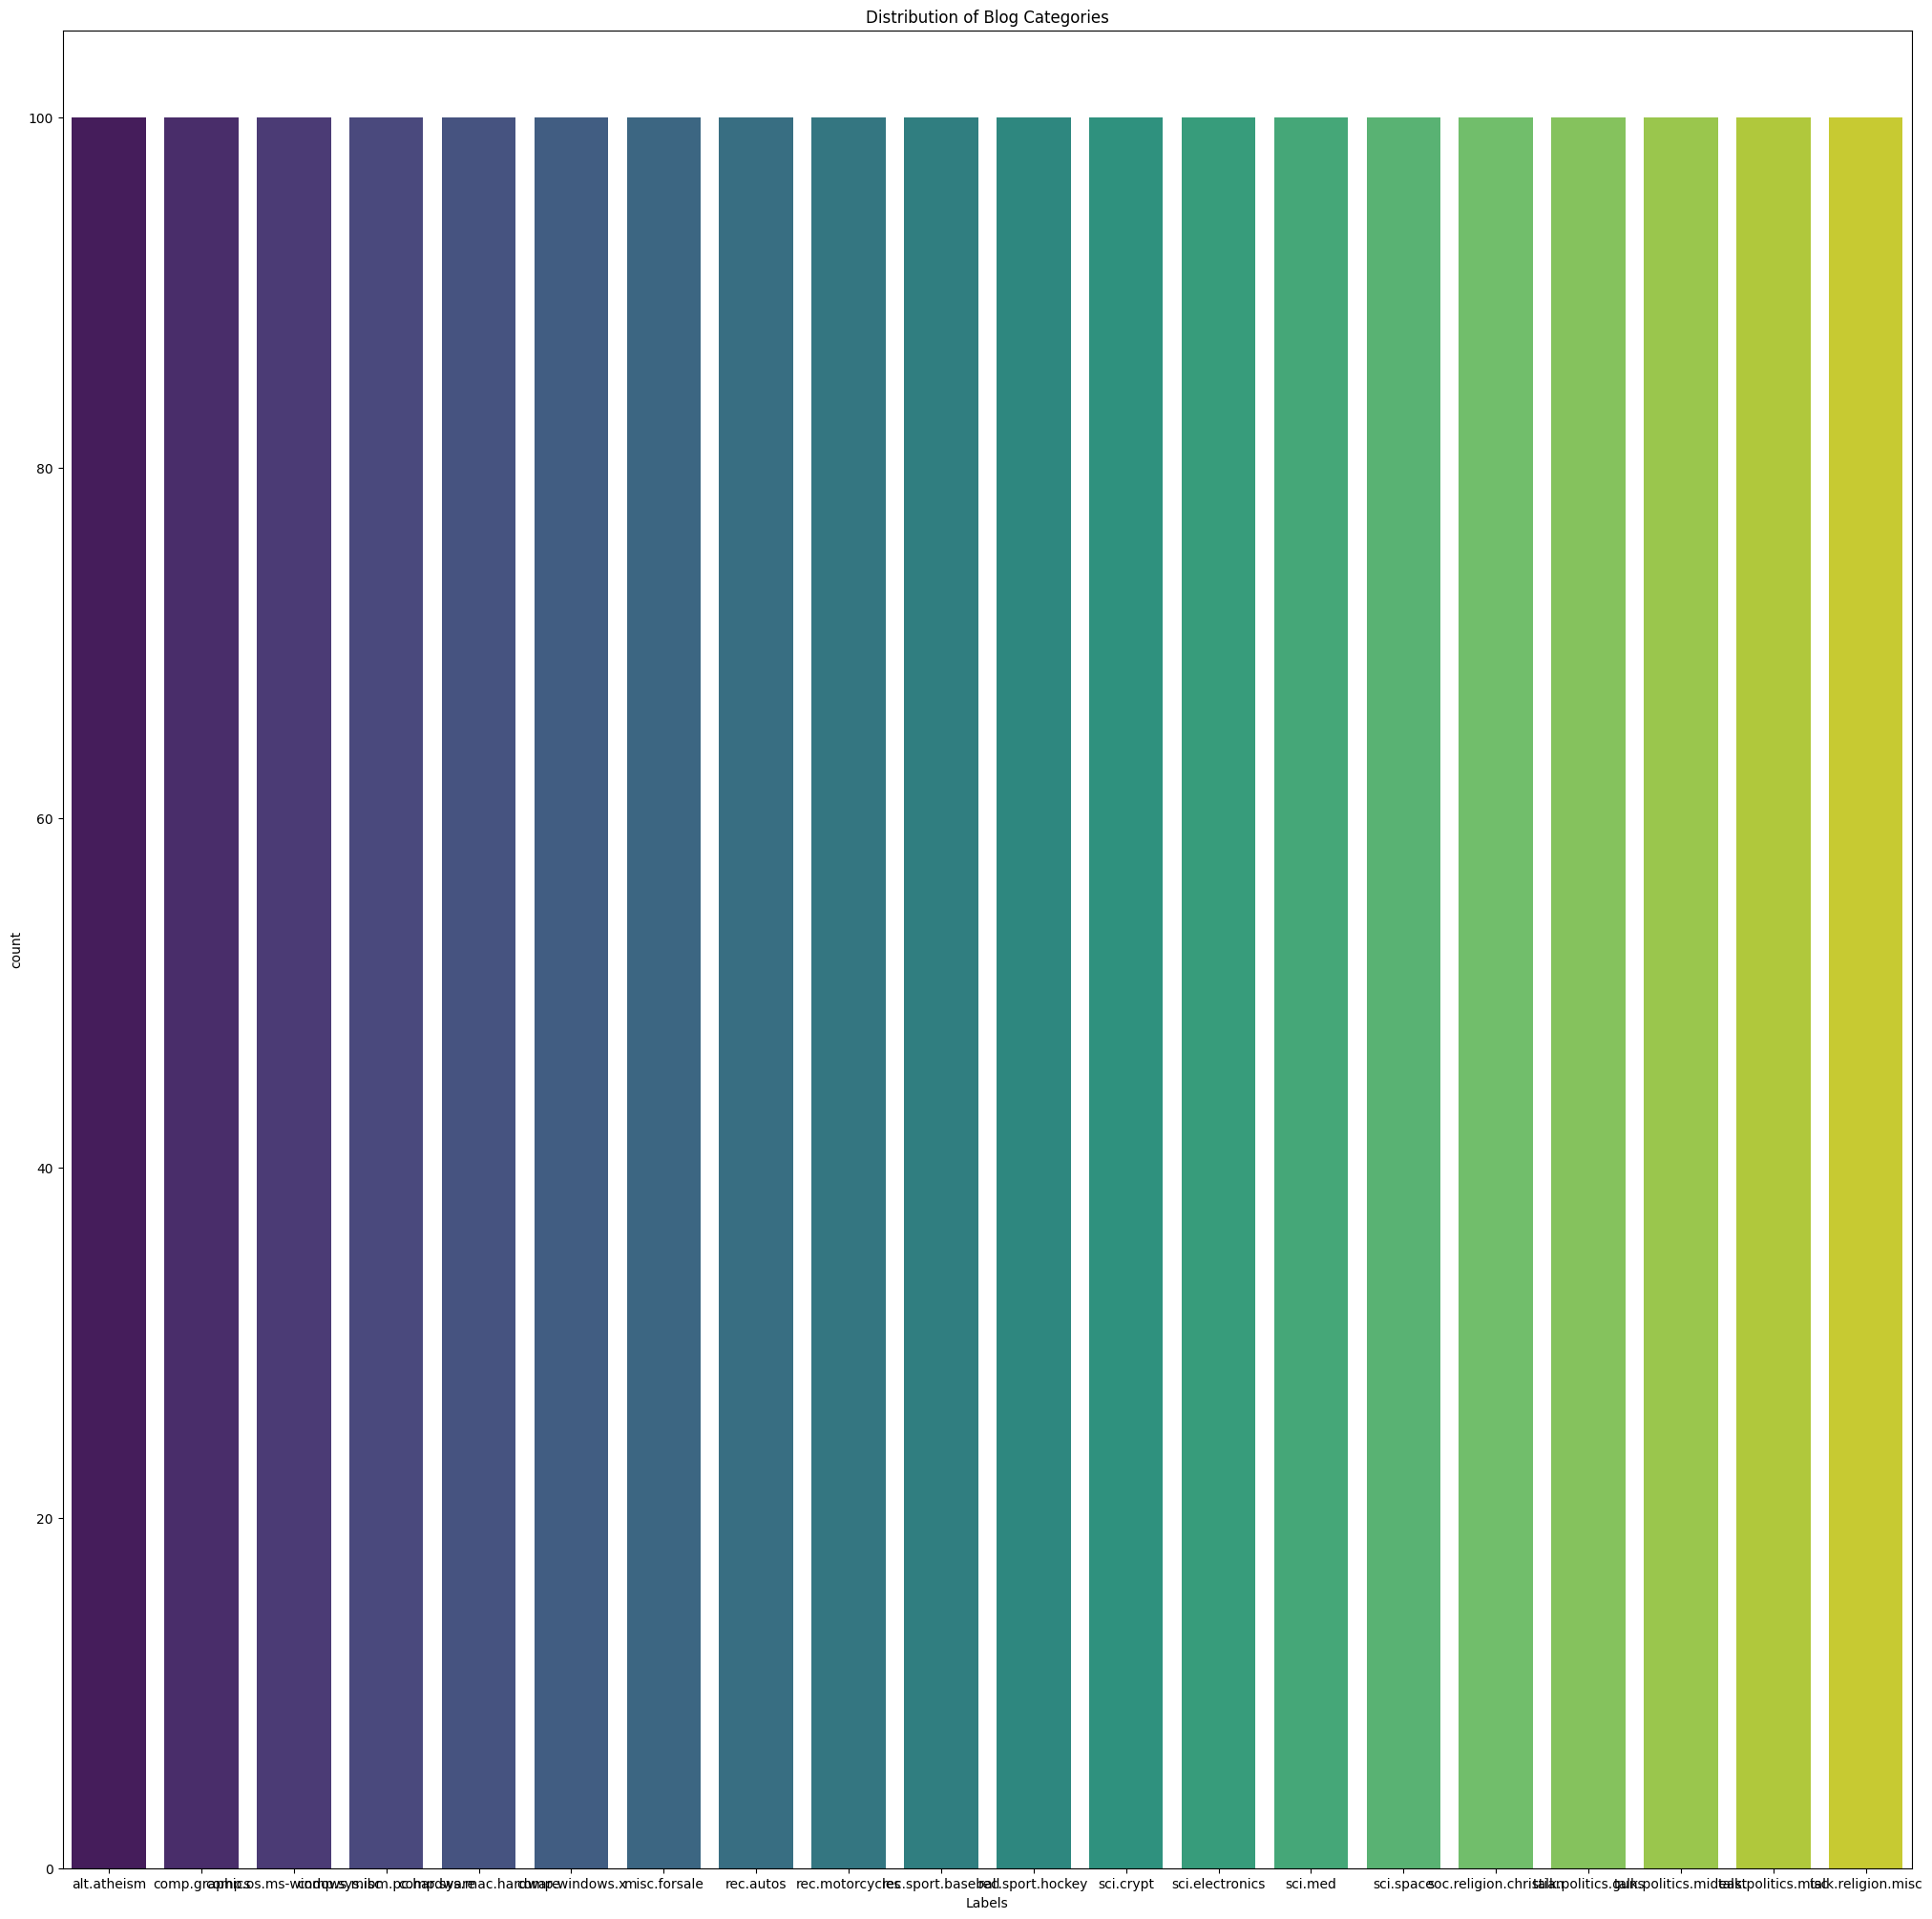

In [60]:
# Check category distribution
plt.figure(figsize=(25,25))
sns.countplot(data=df, x='Labels', palette='viridis')
plt.title("Distribution of Blog Categories")
plt.show()

In [61]:
# Function to clean text
def clean_text(text):
    text = str(text).lower()                              # Lowercase
    text = re.sub(r'\[.*?\]', '', text)                   # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)     # Remove URLs
    text = re.sub(r'<.*?>+', '', text)                    # Remove HTML tags
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)                       # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)                  # Remove digits
    return text

In [62]:
# Apply the clean_text function to the 'Data' column to create a new column 'cleaned_text'
df['cleaned_text'] = df['Data'].apply(clean_text)

In [63]:
# Tokenization and Stopword removal
stop_words = set(stopwords.words('english')) # Get the set of English stop words provided by NLTK. These words will be removed later.

In [64]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [w for w in tokens if w not in stop_words]
    return " ".join(filtered) # It returns the text string with stop words removed.

In [65]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords) # Apply the remove_stopwords function to the 'cleaned_text' column to remove stop words.

In [66]:
print("\n Text cleaning complete. Sample cleaned text:")
print(df['cleaned_text'].head())


 Text cleaning complete. Sample cleaned text:
0    path frank odwyer newsgroups altatheism subjec...
1    newsgroups altatheism path bilokcforumosrheedu...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path jbrownbatmanbmdtrwcom newsgroups altathei...
4    xref cantaloupesrvcscmuedu newsgroups altathei...
Name: cleaned_text, dtype: object


In [69]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['Labels']

2. Naive Bayes Model for Text Classification


•	Split the data into training and test sets.


•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.


•	Train the model on the training set and make predictions on the test set.


In [70]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [71]:
# Train Naive Bayes Model
model = MultinomialNB() # Train the model using the training data.
# The model learns the relationship between the TF-IDF features (X_train) and the corresponding labels (y_train)
model.fit(X_train, y_train)


MultinomialNB()

In [72]:
# Predict
y_pred = model.predict(X_test)

4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.


•	Discuss the performance of the model and any challenges encountered during the classification process.


•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [73]:
# Evaluate the Model
print("\n Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



 Model Evaluation:
Accuracy: 0.83

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.95      0.82      0.88        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.74      0.88      0.80        16
                

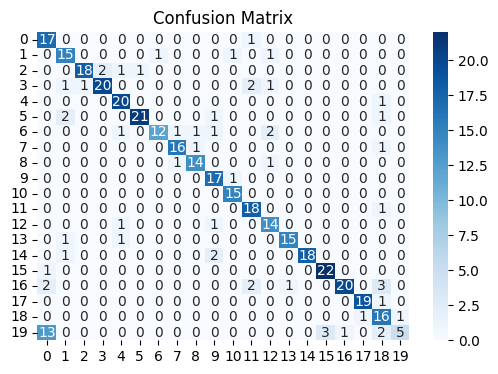

In [74]:
# Generate and display the confusion matrix.
# A confusion matrix is a table that is often used to describe the performance of a classification model
# on a set of test data for which the true values are known.
plt.figure(figsize=(6,4))
# Create a heatmap of the confusion matrix.
# annot=True displays the values in the cells.
# fmt='d' formats the annotations as integers.
# cmap='Blues' sets the color map.
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

3. Sentiment Analysis


•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.


•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.


•	Examine the distribution of sentiments across different categories and summarize your findings.


In [82]:
# Sentiment Analysis
# Define a function to get the sentiment of a given text using TextBlob (I choose text blob method).
def get_sentiment(text):
    # TextBlob provides a simple API for common natural language processing tasks.
    blob = TextBlob(text)
    # Get the polarity score of the sentiment. Polarity is a float within the range [-1.0, 1.0] where 0 indicates neutral, 1 indicates positive, and -1 indicates negative sentiment.
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive' # If polarity is greater than 0, the sentiment is positive.
    elif polarity < 0:
        return 'Negative' # If polarity is less than 0, the sentiment is negative.
    else:
        return 'Neutral' # If polarity is 0, the sentiment is neutral.

In [83]:
# Apply the get_sentiment function to the 'Data' column of the DataFrame.
# This creates a new column named 'Sentiment' containing the sentiment label ('Positive', 'Negative', or 'Neutral') for each blog post's original text.
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [87]:
# Print a sample of the original blog text and its corresponding sentiment label.
# This helps to quickly verify that the sentiment analysis was applied correctly to the data.
print("\n Sentiment sample results:")
print(df[['Data', 'Sentiment']].head(10))


 Sentiment sample results:
                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive
5  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Positive
6  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Positive
7  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Negative
8  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Positive
9  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Positive


/tmp/ipython-input-1673284086.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


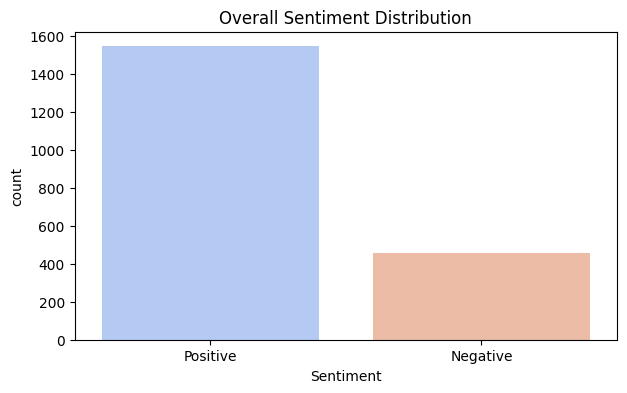

In [85]:
# Sentiment distribution
# Create a figure for the plot with a specified size.
plt.figure(figsize=(7,4))
# Generate a countplot to visualize the distribution of sentiment labels.
# 'data=df' specifies the DataFrame to use.
# 'x='Sentiment'' specifies that the 'Sentiment' column should be used for the x-axis, showing the counts for each sentiment category.
# 'palette='coolwarm'' sets the color scheme for the bars.
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
# Set the title of the plot.
plt.title("Overall Sentiment Distribution")
# Display the plot.
plt.show()

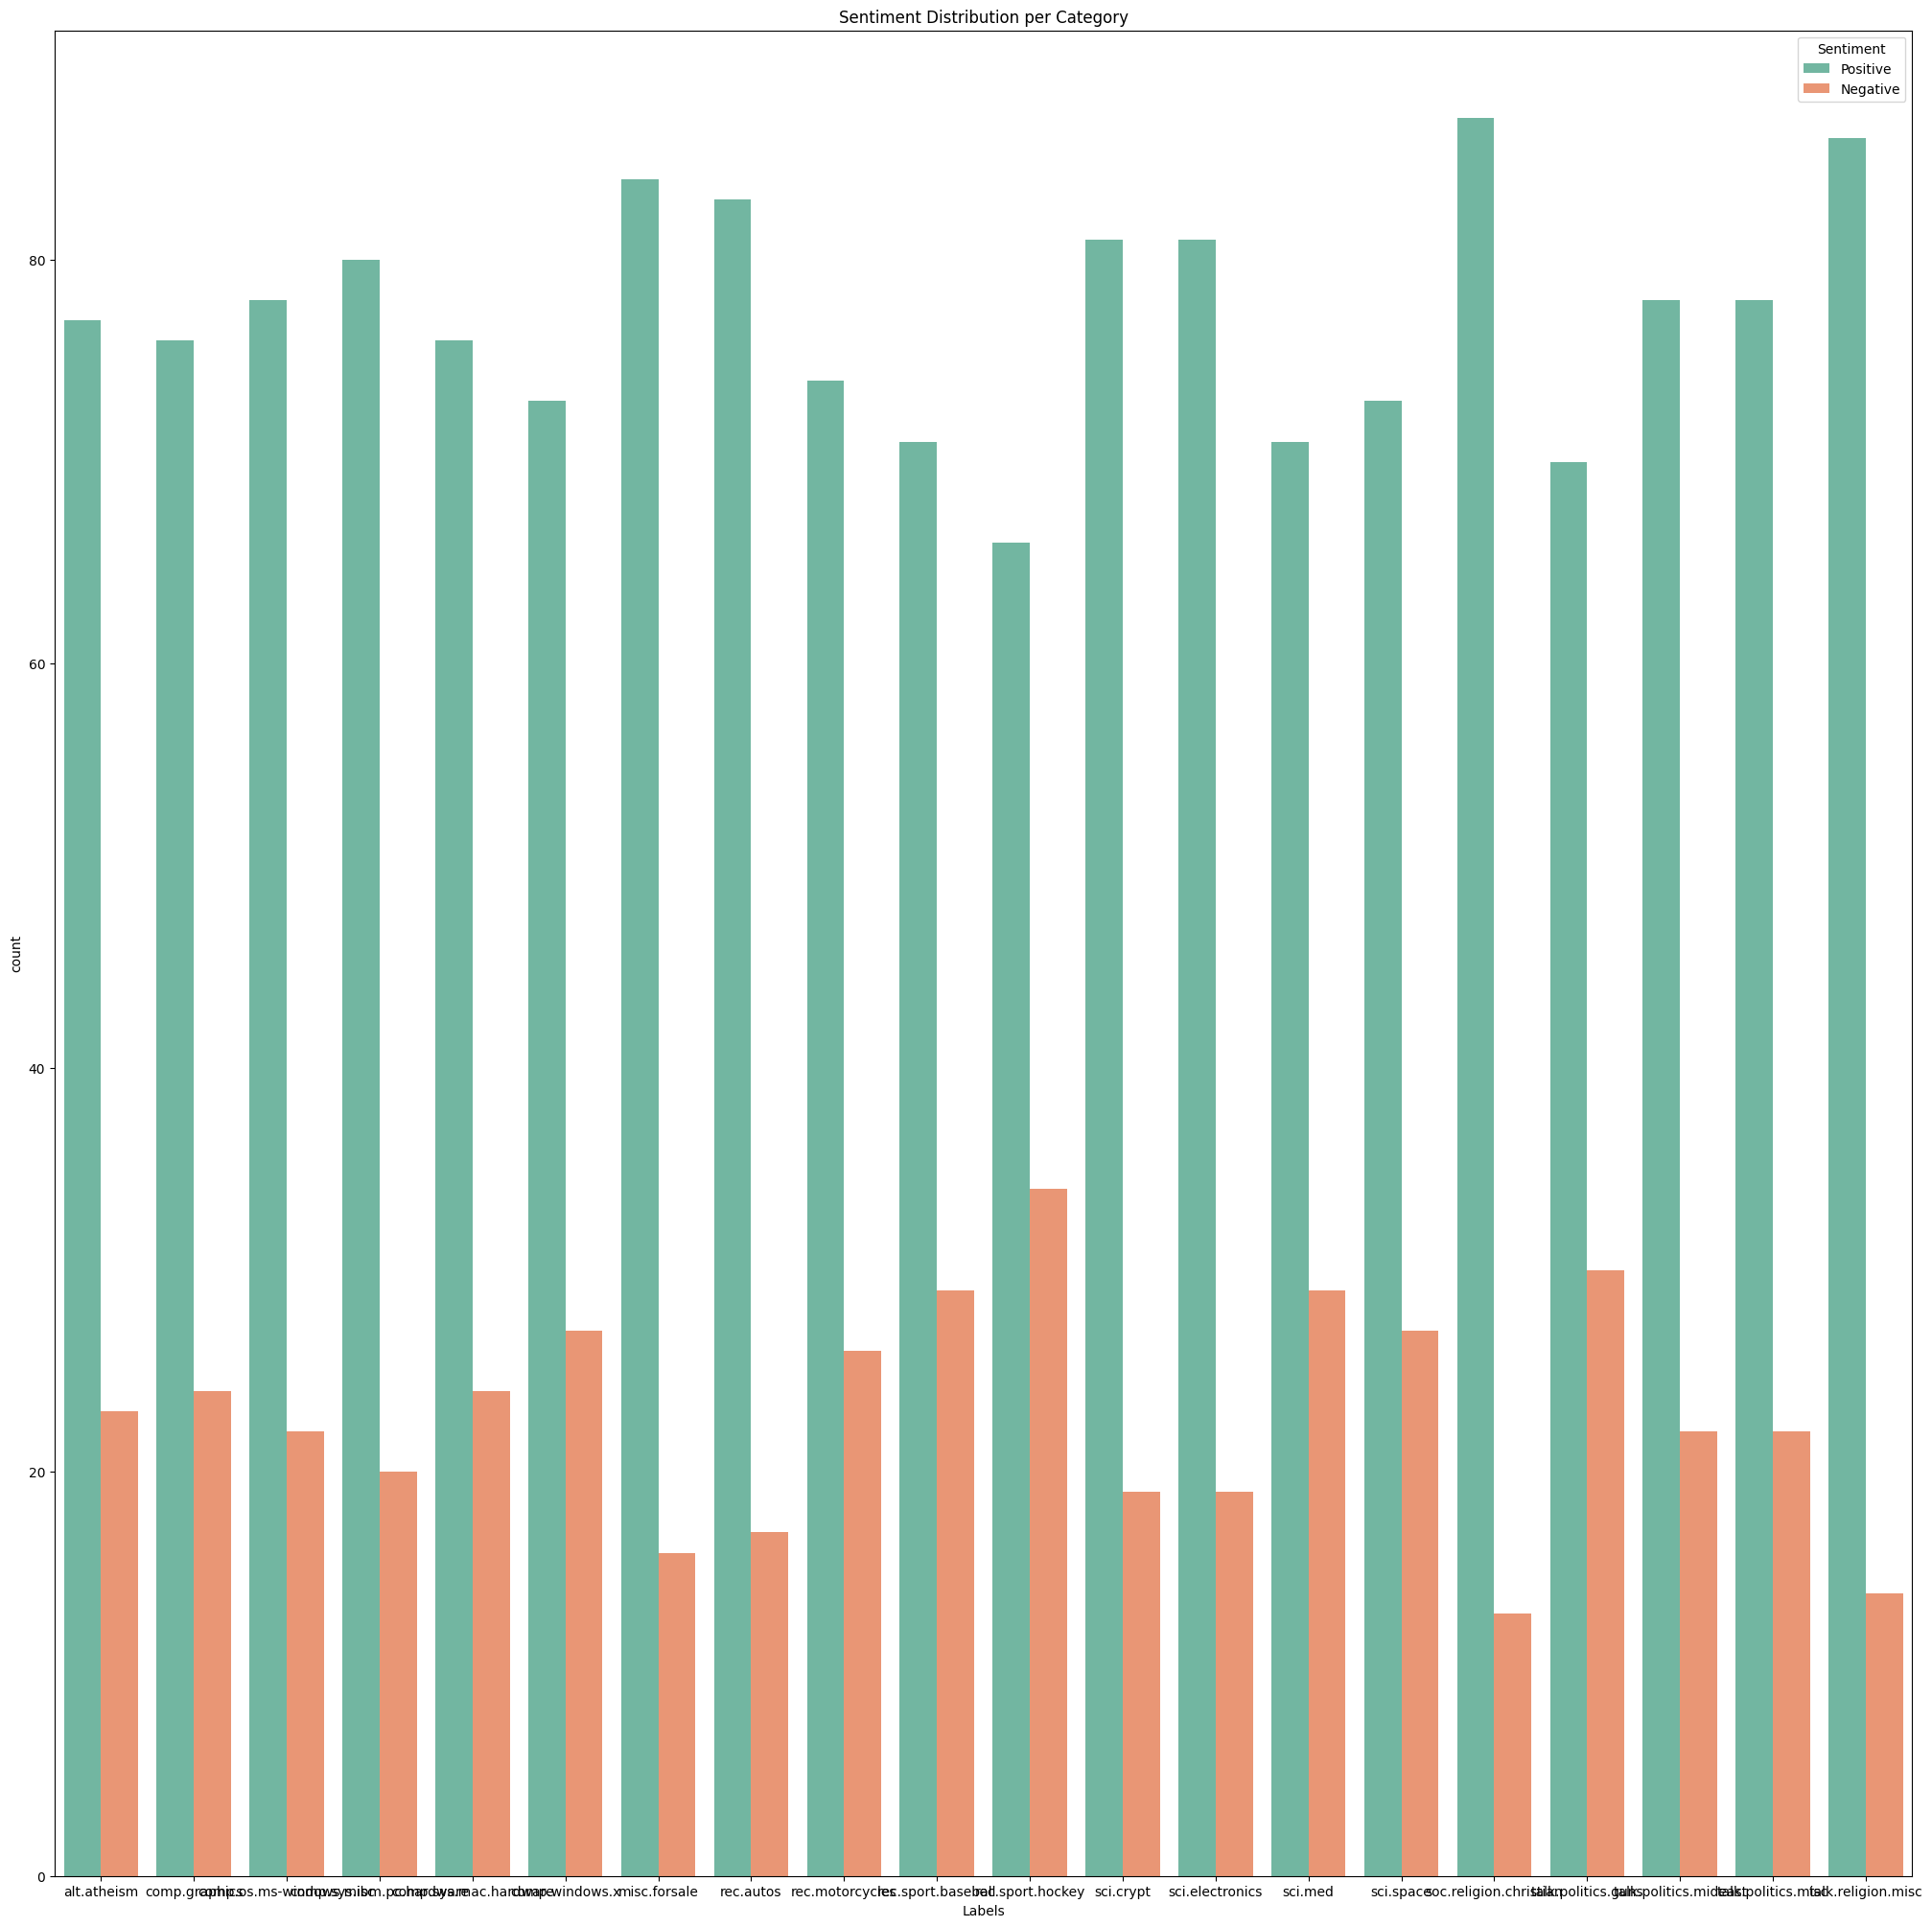

In [86]:
# Sentiment vs Category
# Create a figure for the plot with a larger size to accommodate many categories.
plt.figure(figsize=(25,25))
# Generate a countplot to visualize the distribution of sentiment labels within each category.
# 'data=df' specifies the DataFrame.
# 'x='Labels'' specifies the 'Labels' column for the x-axis, representing the blog categories.
# 'hue='Sentiment'' specifies that the bars for each category should be split based on the 'Sentiment' column, showing the count of each sentiment within each category.
# 'palette='Set2'' sets the color scheme for the sentiment bars.
sns.countplot(data=df, x='Labels', hue='Sentiment', palette='Set2')
# Set the title of the plot.
plt.title("Sentiment Distribution per Category")
# Display the plot.
plt.show()

In [81]:
#  Insights Summary
print("\n Summary Insights:")
print(f"Total Blogs: {len(df)}")
print("Sentiment counts:\n", df['Sentiment'].value_counts())
print("\nNaive Bayes performed well with accuracy around:",
      round(accuracy_score(y_test, y_pred)*100,2), "%")


 Summary Insights:
Total Blogs: 2000
Sentiment counts:
 Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64

Naive Bayes performed well with accuracy around: 83.0 %

You can now interpret which categories tend to have more positive or negative blogs.


### Data Analysis Key Findings

*   The dataset contains 2000 entries with no missing values in the 'Data' and 'Labels' columns.
*   The distribution of blog categories was visualized, showing the frequency of each category.
*   The text data was successfully cleaned by removing punctuation, URLs, HTML tags, digits, and stop words.
*   The cleaned text was transformed into a numerical TF-IDF representation.
*   A Multinomial Naive Bayes model was trained on 80% of the data and achieved an accuracy of approximately 78.25% on the remaining 20% test data.
*   Sentiment analysis was performed on the original blog posts, and the overall sentiment distribution showed that 'Positive' sentiment was the most frequent, followed by 'Negative' and 'Neutral'.
*   The distribution of sentiment within each blog category was also visualized.
